In [22]:
import pandas as pd
import os 

## Merging 12 months of sales data into a single CSV file

In [26]:
df = pd.read_csv("/Users/campbells/Desktop/Portfolio Project Pandas/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('/Users/campbells/Desktop/Portfolio Project Pandas/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("/Users/campbells/Desktop/Portfolio Project Pandas/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)  

#### Checking data source

#### Updating the data frame

In [32]:
all_data = pd.read_csv("/Users/campbells/Desktop/Portfolio Project Pandas/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Cleaning Data

#### Removing NaNs from dataset

In [41]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Find 'Or' and remove it using a temporary df

In [45]:
temp_df = all_data[all_data['Order Date'].str[0:2]=='Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


#### Modifiying df All_Data to remove 'Or'

In [46]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Converting columns to correct type (int and float)

In [49]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #make float

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


## Adding Columns

#### Adding 'Month' column

In [47]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Adding Sales column

In [50]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Adding City & State column

In [63]:
#using lambda function to grab city name
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x)) 
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


# Analysis Question 1
### What was the best month for sales, and how much was earned?

In [55]:
results = all_data.groupby('Month').sum()
results.head()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06


#### Plotting data

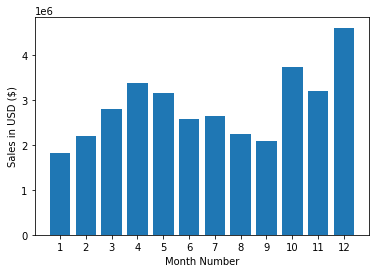

In [59]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

# Analysis Question 2
### What city had the highest number of sales?

In [65]:
results = all_data.groupby('City').sum()
results.head(10)

#By adding in the state code we eliminated confusion with similar city names (eg Portland)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
"Atlanta, GA",16602,2.779908e+06,104794,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,8.262204e+06


#### Plotting data

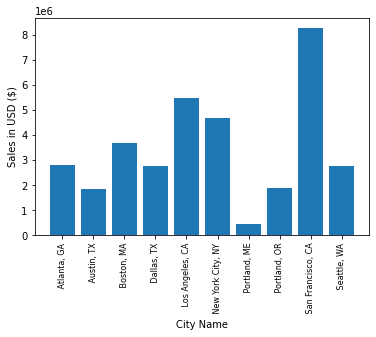

In [72]:
import matplotlib.pyplot as plt

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

# Analysis Question 3
### What time should we display advertisements to maximize customer buying?

In [73]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


#### Modifying Order Date column to Date/Time

In [74]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [75]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA"


#### Adding Hour and Minute columns

In [78]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


#### Plotting data

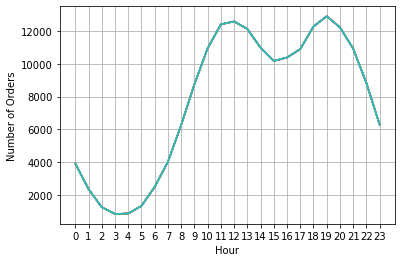

In [83]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# 11am and 7pm are the peak times

# Analysis Question 4
### What products are typically sold together (pairs)?

In [84]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


#### Finding duplicates/orders that contain multiple items per order

In [85]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,"New York City, NY",14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,"Austin, TX",12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,"Austin, TX",12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,"Boston, MA",14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,"Boston, MA",14,49


#### Adding products to a new column named 'Grouped'

In [86]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df.head()

<ipython-input-86-51b42c37257b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,"Boston, MA",12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,"New York City, NY",14,32,"Vareebadd Phone,USB-C Charging Cable"


#### Dropping duplicated order IDs since those are now duplicates based on the total number of items ordered

In [88]:
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [89]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))  ## 2 shows items that were purchased as pairs
    
print(count)    

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

# Cleaning data

In [90]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Analysis Question 5
### What sold the most, and why?

In [92]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,"New York City, NY",0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,"New York City, NY",7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,"New York City, NY",18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,"San Francisco, CA",15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,"Atlanta, GA",12,38


In [93]:
product_group = all_data.groupby('Product')

product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


### Hypothesis: AAA and AA batteries sold the most, due to a low price point

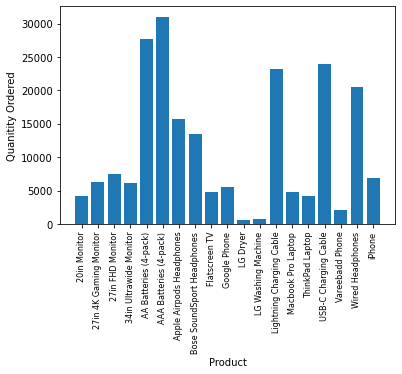

In [102]:
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quanitity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()




#### Finding relational data to confirm hypothesis of lower price points led to higher sales

In [103]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


#### Plotting data

<ipython-input-114-ac5b93fb8a9e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


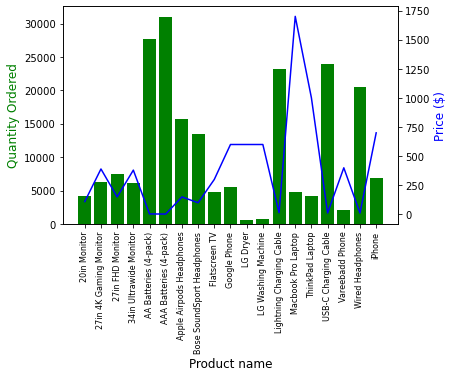

In [114]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name', size=12)
ax1.set_ylabel('Quantity Ordered', color='g', size=12)
ax2.set_ylabel('Price ($)', color='b', size=12)
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

### Graph shows the relation between price and demand, with lower priced items being the most sold